In [1]:
import os
import re
import matplotlib.pylab as plt
from labellines import labelLine, labelLines
import seaborn as sns
import numpy as np


In [2]:
############ color stuff (https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b) ###############

def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

#color1 = "#8A5AC2"
color2 = "#3575D5"

color1 = '#FB575D'
#color2 = '#15251B'

# a = [120,121,122,123,124,125,126]

# get_color_gradient(color1, color2, len(a))

<ipython-input-6-189982b23ab8>:51: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig2.add_subplot(111)
<ipython-input-6-189982b23ab8>:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


added in 120
added in 121
added in 122
added in 123
added in 124
added in 125
added in 126
added in 127
added in 128
added in 129
added in 130
added in 131
added in 132
added in 133
added in 134
added in 135
added in 136
added in 137
added in 138
added in 139
added in 140


<ipython-input-6-189982b23ab8>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2 = plt.figure()
<ipython-input-6-189982b23ab8>:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


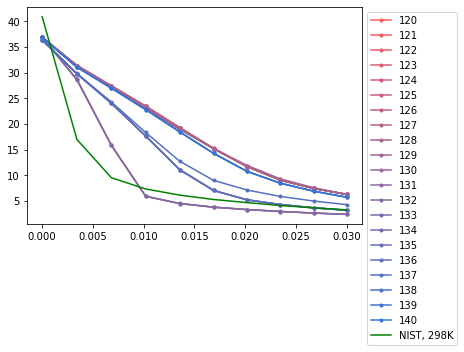

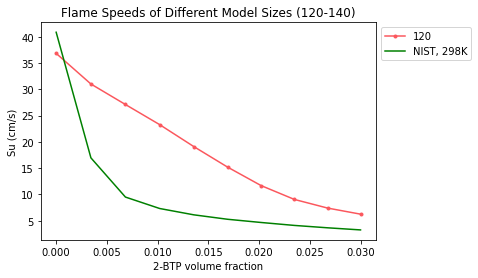

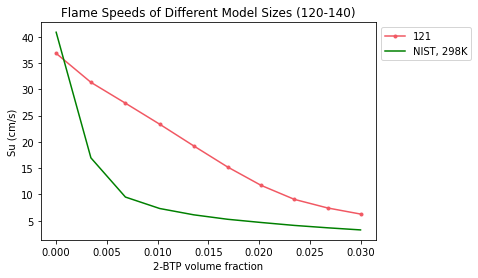

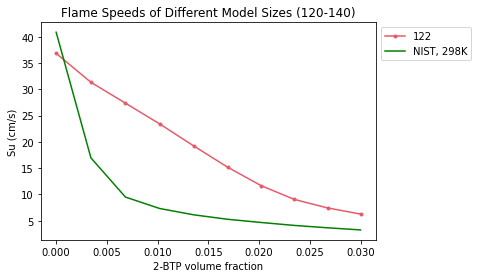

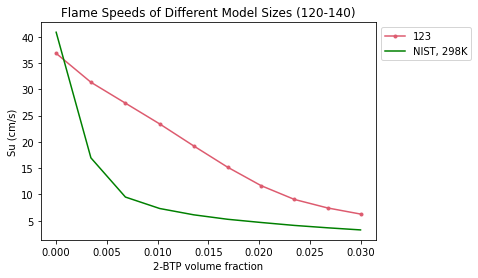

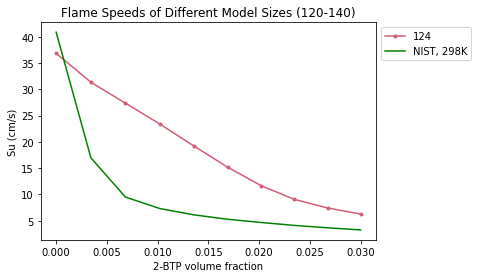

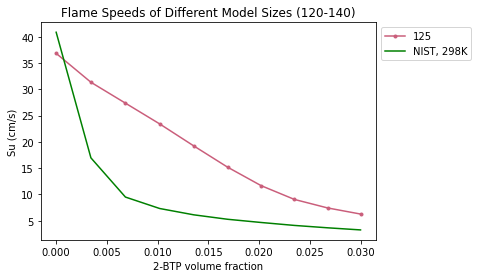

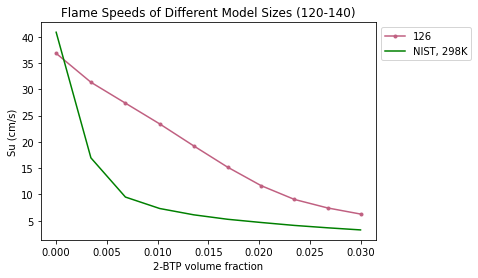

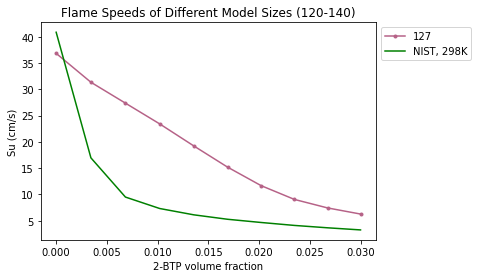

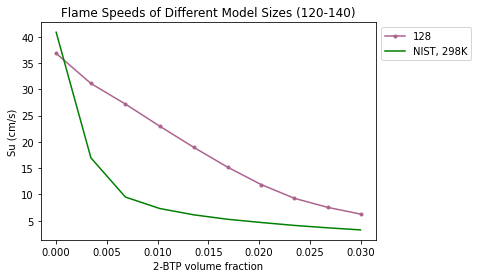

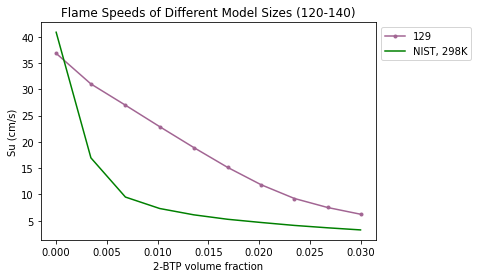

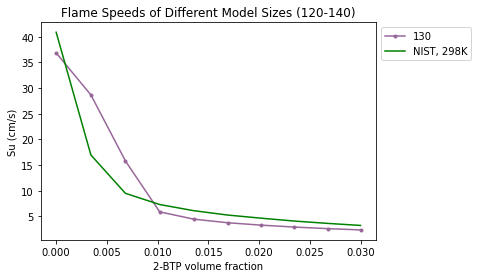

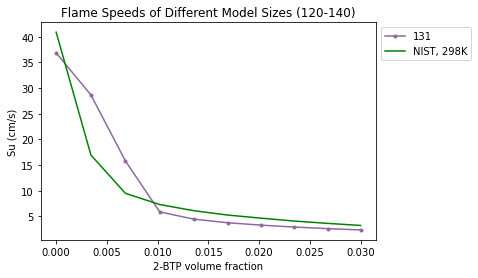

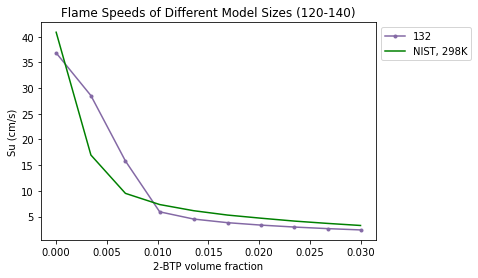

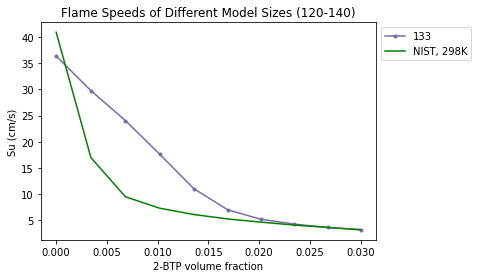

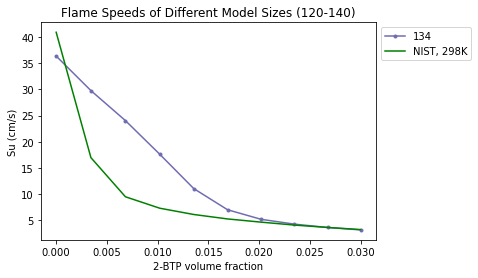

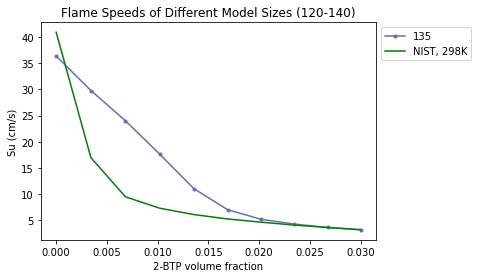

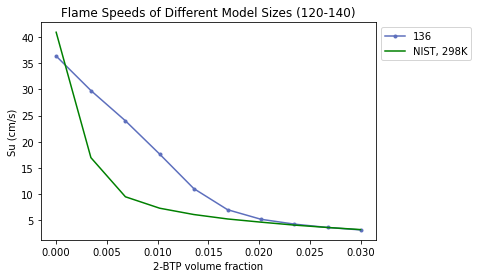

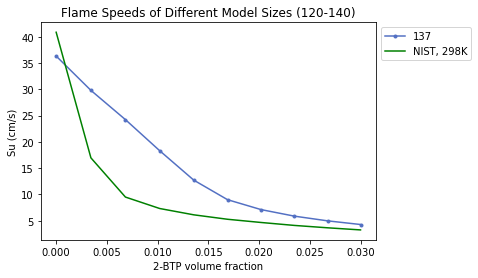

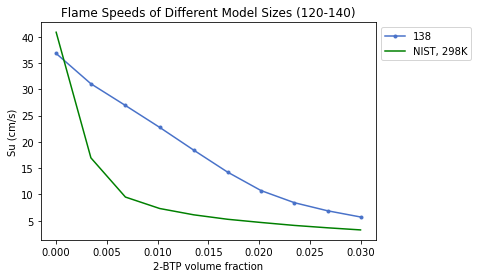

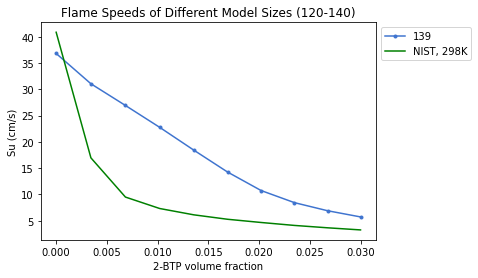

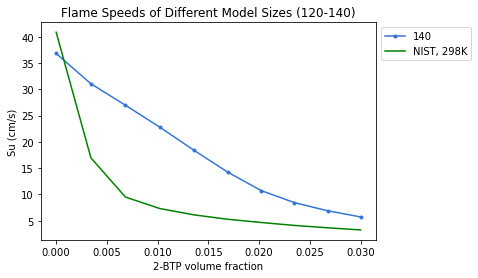

In [6]:

directory = './parallel'

list_of_blends = [file for file in os.listdir(directory) if re.search('par_flame_speeds_0([0-9]+)\.csv', file)]
colors = get_color_gradient(color1, color2, len(list_of_blends ))

fig = plt.figure()


#add in NIST model

volfrac_of_btp = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]
# fracs = [x*100 for x in volfrac_of_btp]
flamespeeds = [0.40875258644125273,0.16966926524557838,0.09506093355318838,0.07327356686247803,0.061265194613989125,0.052793644460558425,0.04667136814266926,0.04106928680179994,0.0365547487209216,0.03252991701877541]
speeds = [x*100 for x in flamespeeds]

#add in NIST model

volfrac_of_btp = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]
# fracs = [x*100 for x in volfrac_of_btp]
flamespeeds = [0.40875258644125273,0.16966926524557838,0.09506093355318838,0.07327356686247803,0.061265194613989125,0.052793644460558425,0.04667136814266926,0.04106928680179994,0.0365547487209216,0.03252991701877541]
speeds_ = [x*100 for x in flamespeeds]




for color, file in zip(colors, list_of_blends): 
    
        fig2 = plt.figure()
        match = re.search('par_flame_speeds_0([0-9]+)\.csv', file)


        with open(f'./parallel/{file}','r') as f: 
            values = f.readlines()
        BTP_fractions = [float(x) for x in values[1].split(',')]
       # print(values[1].split(','))
        speed = [float(x) for x in values[2].split(',')]
        speeds = [x*100 for x in speed]
        


        #plotting 
        
        ax1 = fig.add_subplot(111)
        ax1.plot(BTP_fractions, speeds, '.-', c=f'{color}', label=str(match.group(1)))

        plt.xlabel('2-BTP volume fraction')
        plt.ylabel('Su (cm/s)')
        plt.title('Flame Speeds of Different Model Sizes (120-140)')
        ax1.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
        
        ax2 = fig2.add_subplot(111)
        ax2.plot(BTP_fractions, speeds, '.-', c=f'{color}', label=str(match.group(1)))
        ax2.plot(volfrac_of_btp, speeds_, '-', c='g', label='NIST, 298K' )
        ax2.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
        print(f'added in {match.group(1)}')


#add in NIST model

volfrac_of_btp = [0.0,0.0034246488829682868,0.006825921381900819,0.01020405603073009,0.01355928812903828,0.016891849796691408,0.02020197002736977,0.023489874741020596,0.02675578683525816,0.029999926235735837]
# fracs = [x*100 for x in volfrac_of_btp]
flamespeeds = [0.40875258644125273,0.16966926524557838,0.09506093355318838,0.07327356686247803,0.061265194613989125,0.052793644460558425,0.04667136814266926,0.04106928680179994,0.0365547487209216,0.03252991701877541]
speeds = [x*100 for x in flamespeeds]
        
        

ax1 = fig.add_subplot(111)

ax1.plot(volfrac_of_btp, speeds_, '-', c='g', label='NIST, 298K' )


plt.xlabel('2-BTP volume fraction')
plt.ylabel('Su (cm/s)')
plt.title('Flame Speeds of Different Model Sizes (120-140)')
ax1.legend(bbox_to_anchor=(0.5, 0., 0.8, 1))
        
      

        
        

Plot Flamespeed v. Model Size 

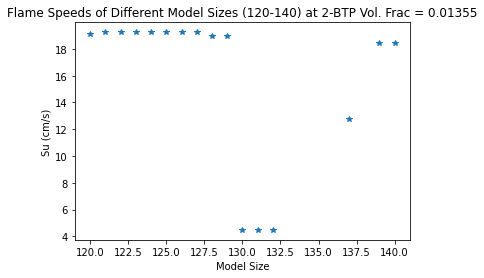

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
model_sizes = []
speeds_at_0_01355 = []

for file in list_of_blends: 
    
    match = re.search('par_flame_speeds_0([0-9]+)\.csv', file)


    with open(f'./parallel/{file}','r') as f: 
        values = f.readlines()
    BTP_fractions = [float(x) for x in values[1].split(',')]
    speed = [float(x) for x in values[2].split(',')]
    speeds = [x*100 for x in speed]
    speeds_at_0_01355.append(speeds[4])
    model_sizes.append(int(match.group(1)))
           
    
    
        
# #plotting 
ax1.plot(model_sizes, speeds_at_0_01355, '*')
plt.xlabel('Model Size')
plt.ylabel('Su (cm/s)')
plt.title('Flame Speeds of Different Model Sizes (120-140) at 2-BTP Vol. Frac = 0.01355')

plt.show()






NIST from plot (eyeballed)